In [ ]:
# The following notebook is to be run in Colab.
# Colab is used since it provides GPU.
# Also it is much quicker to upload large datasets to drive and unzip it using colab when compared to uploading the same in kaggle.
# Change your runtime type to GPU preferably GPU T4

## 1.1 Import Dependencies

In [ ]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.2 Upload data

In [ ]:
# Upload anchor.zip, positive.zip from C:\Users\Tarun\UF3\data3 and unzip

In [ ]:
!unzip anchor.zip

Archive:  anchor.zip
  inflating: anchor/056185d8-0375-11ee-99ba-d3464babc6c7.jpg  
  inflating: anchor/056d9f54-0375-11ee-9e1f-d3464babc6c7.jpg  
  inflating: anchor/0572703b-0375-11ee-8c88-d3464babc6c7.jpg  
  inflating: anchor/0576c105-0375-11ee-870d-d3464babc6c7.jpg  
  inflating: anchor/05805d30-0375-11ee-881d-d3464babc6c7.jpg  
  inflating: anchor/0589ed15-0375-11ee-aa8a-d3464babc6c7.jpg  
  inflating: anchor/0592b393-0375-11ee-b968-d3464babc6c7.jpg  
  inflating: anchor/05a0f969-0375-11ee-a75f-d3464babc6c7.jpg  
  inflating: anchor/05af0923-0375-11ee-84e0-d3464babc6c7.jpg  
  inflating: anchor/05b3dd7a-0375-11ee-8017-d3464babc6c7.jpg  
  inflating: anchor/05c21349-0375-11ee-aa16-d3464babc6c7.jpg  
  inflating: anchor/05cf7468-0375-11ee-b5df-d3464babc6c7.jpg  
  inflating: anchor/05d4725a-0375-11ee-bb52-d3464babc6c7.jpg  
  inflating: anchor/05e1079c-0375-11ee-8df9-d3464babc6c7.jpg  
  inflating: anchor/05e5daf4-0375-11ee-8e90-d3464babc6c7.jpg  
  inflating: anchor/05ea5ff7-0375-

In [ ]:
!unzip positive.zip

Archive:  positive.zip
  inflating: positive/8130b337-0375-11ee-bf69-d3464babc6c7.jpg  
  inflating: positive/81e23830-0375-11ee-92be-d3464babc6c7.jpg  
  inflating: positive/82327c58-0375-11ee-ac6c-d3464babc6c7.jpg  
  inflating: positive/8247ccd8-0375-11ee-9cff-d3464babc6c7.jpg  
  inflating: positive/825b020c-0375-11ee-a6c1-d3464babc6c7.jpg  
  inflating: positive/8268e92f-0375-11ee-be6c-d3464babc6c7.jpg  
  inflating: positive/8276f741-0375-11ee-9429-d3464babc6c7.jpg  
  inflating: positive/8295a1c8-0375-11ee-b4b1-d3464babc6c7.jpg  
  inflating: positive/82a41054-0375-11ee-a5e3-d3464babc6c7.jpg  
  inflating: positive/82b29070-0375-11ee-9b11-d3464babc6c7.jpg  
  inflating: positive/82c576c1-0375-11ee-b6f7-d3464babc6c7.jpg  
  inflating: positive/82ceccaf-0375-11ee-8737-d3464babc6c7.jpg  
  inflating: positive/82d85ca0-0375-11ee-821c-d3464babc6c7.jpg  
  inflating: positive/82e8df66-0375-11ee-9038-d3464babc6c7.jpg  
  inflating: positive/82fbb860-0375-11ee-9169-d3464babc6c7.jpg  
  

In [ ]:
# Upload negative.zip from drive and unzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/negative.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

## 1.3 Set GPU Growth

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 2.3 Data Augmentation

In [ ]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))

        data.append(img)

    return data

In [ ]:
import uuid

In [ ]:
# Setup paths
POS_PATH = os.path.join('/content', 'positive')
NEG_PATH = os.path.join('/content', 'negative')
ANC_PATH = os.path.join('/content', 'anchor')

In [ ]:
for file_name in os.listdir(os.path.join(ANC_PATH)):
    img_path = os.path.join(ANC_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)

    for image in augmented_images:
        cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [ ]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)

    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [ ]:
print(len(os.listdir(os.path.join(ANC_PATH))))
len(os.listdir(os.path.join(POS_PATH)))

4350


4900

# 3. Load and Preprocess Images

## 3.1 Get Image Directories

In [ ]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(3000)

In [ ]:
dir_test = anchor.as_numpy_iterator()

In [ ]:
print(dir_test.next())

b'/content/anchor/147a3bb2-04fd-11ee-b736-0242ac1c000c.jpg'


## 3.2 Preprocessing - Scale and Resize

In [ ]:
def preprocess(file_path):

    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1
    img = img / 255.0

    # Return image
    return img

In [ ]:
img = preprocess('/content/anchor/0b0df3ea-0375-11ee-adca-d3464babc6c7.jpg')

In [ ]:
img.numpy().max()

1.0

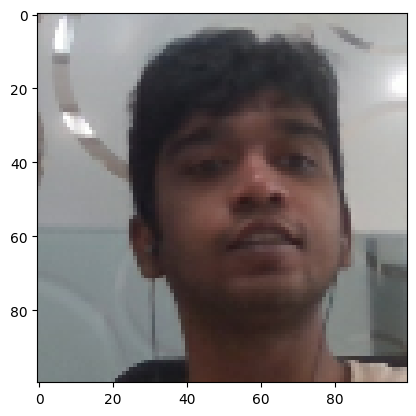

In [ ]:
plt.imshow(img)

## 3.3 Create Labelled Dataset

In [ ]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [ ]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [ ]:
samples = data.as_numpy_iterator()

In [ ]:
example = samples.next()

In [ ]:
example

(b'/content/anchor/071c9fdc-04fd-11ee-b736-0242ac1c000c.jpg',
 b'/content/positive/482f93d0-04fd-11ee-b736-0242ac1c000c.jpg',
 1.0)

## 3.4 Build Train and Test Partition

In [ ]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [ ]:
res = preprocess_twin(*example)

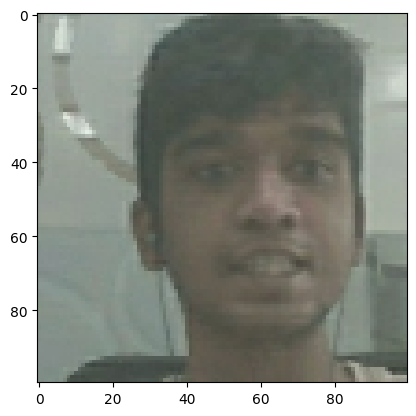

In [ ]:
plt.imshow(res[0])

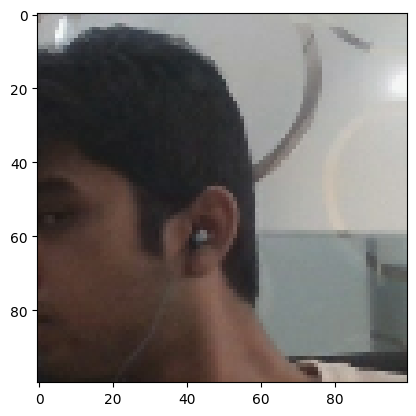

In [ ]:
plt.imshow(res[1])

In [ ]:
res[2]

1.0

In [ ]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [ ]:
samples=data.as_numpy_iterator()

In [ ]:
samp=samples.next()

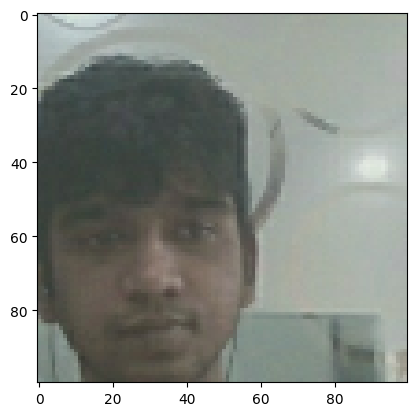

In [ ]:
plt.imshow(samp[0])

In [ ]:
samp[2]

1.0

In [ ]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [ ]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering

## 4.1 Build Embedding Layer

In [ ]:
def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')

    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # Third block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)


    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

## 4.2 Build Distance Layer

In [ ]:
# Siamese L1 Distance class
class L1Dist(Layer):

    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()

    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
l1 = L1Dist()

In [ ]:
l1

## 4.3 Make Siamese Model

In [ ]:
def make_siamese_model():

    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))

    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(100,100,3))

    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    # Classification layer
    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_model = make_siamese_model()

In [ ]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 5. Training

## 5.1 Setup Loss and Optimizer

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [ ]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [ ]:
!mkdir training_checkpoints

In [ ]:
checkpoint_dir = '/content/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## 5.3 Build Train Step Function

In [ ]:
@tf.function
def train_step(batch):

    # Record all of our operations
    with tf.GradientTape() as tape:
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

    # Return loss
    return loss

## 5.4 Build Training Loop

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        # Creating a metric object
        r = Recall()
        p = Precision()

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat)
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())

        # Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Train the model

In [ ]:
EPOCHS = 50

In [ ]:
train(train_data,EPOCHS)


 Epoch 1/50
263/263 [==============================] - 73s 277ms/step
0.11562785 0.98579544 0.99808246

 Epoch 2/50
263/263 [==============================] - 71s 269ms/step
2.9484541e-05 0.9875479 0.99806386

 Epoch 3/50
263/263 [==============================] - 71s 270ms/step
0.010931693 0.9910546 0.9995252

 Epoch 4/50
 27/263 [==>...........................] - ETA: 59s

KeyboardInterrupt: ignored

# 6. Evaluate Model

## 6.1 Make Predictions

In [ ]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 0s 26ms/step


array([[1.2316697e-06],
       [6.5005997e-07],
       [1.0000000e+00],
       [9.9996662e-01],
       [3.0095293e-07],
       [9.9999952e-01],
       [9.9514246e-01],
       [5.0682183e-07],
       [9.9988186e-01],
       [9.9996686e-01],
       [9.8874342e-01],
       [2.8852710e-07],
       [9.9998641e-01],
       [1.0000000e+00],
       [9.9999785e-01],
       [3.7469309e-07]], dtype=float32)

In [ ]:
# Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0]

In [ ]:
y_true

array([0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
      dtype=float32)

## 6.2 Calculate Metrics

In [ ]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
# Creating a metric object
m = Precision()

# Calculating the precision value
m.update_state(y_true, y_hat)

# Return Precision Result
m.result().numpy()

1.0

In [ ]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat)

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 0s 22ms/step
0.99888515 1.0


## 6.3 Viz Results

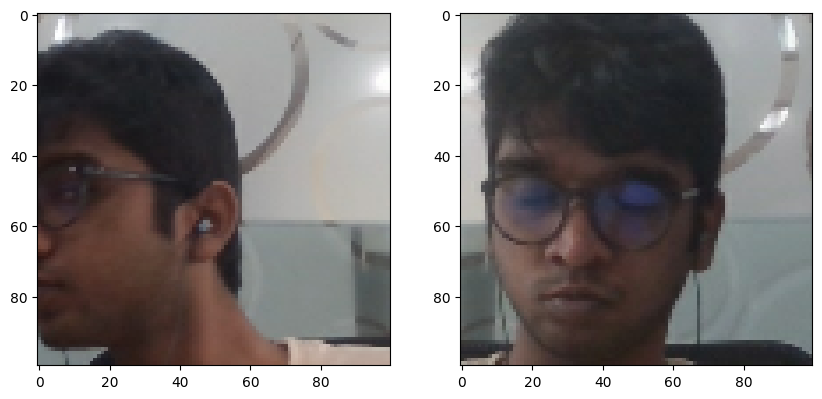

In [ ]:
# Set plot size
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[3])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[3])

# Renders cleanly
plt.show()

# 7. Save Model

In [ ]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

In [ ]:
L1Dist

__main__.L1Dist

In [ ]:
# Reload model
model = tf.keras.models.load_model('siamesemodelv2.h5',
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

1/1 [==============================] - 0s 114ms/step


array([[9.1377622e-01],
       [1.4455010e-05],
       [3.1045249e-06],
       [4.9712421e-06],
       [2.8374874e-08],
       [8.2823099e-05],
       [1.2174650e-07],
       [5.9833013e-07]], dtype=float32)